In [46]:
import math

## PHYSICAL CONSTANTS 
R      = 8.3145  # J/mol-K, ideal gas constant
T      = 298.15  # K, temperature
F      = 96485   # C/mol, Faraday's constant
S      = 1E-6   #  electrode surface. Default = 1E-6
F_norm = F/(R*T)


## INDEPENDENT VARIABLES 
### EXPERIMENTALLY CONTROLED
C_red_val  = 1.0    #  mol/L, initial concentration of O. Default = 1.0
C_ox_val   = 0.0    #  mol/L, initial concentration of O. Default = 1.0



### SYSTEM DEPENDENT
E_0        = 0.0    #  electrochemical potential. Default = 0.0
D          = 1E-5   #  cm^2/s, O & R diffusion coefficient. Default = 1E-5
n          = 1.0    #  number of electrons transfered. Default = 1
alpha      = 0.5    #  dimensionless charge-transfer coefficient. Default = 0.5
k0         = 1E-2   #  cm/s, electrochemical rate constant. Default = 1E-2
kc         = 1E-3   #  1/s, chemical rate constant. Default = 1E-3

## SIMULATION VARIABLES
# simulation accuracy in time and space
Nt      = 10000      # number of iterations per t_k (pg 790). Default = 500
Nx      = 200       # number of spatial boxes  Default = 200

# key adimensionnated parameters
DM      = 0.45      #DM = D*Dt/Dx**2 numerical adimensionated diffusion parameter. Default = 0.45
Lambda  = 2         #Lambda  = k0*Dx/D numerical adimensionated electron transfer parameter. Fast if 

# physical distances according to the previosu parameters
L_cuve  = math.floor(D*Nt**0.5) + 3  # longueur physique de la cuve so that we are always in a diffusion controled system
Dx      = L_cuve/Nx  # pas d'espace

## Experimental paramteres in the case of a linear sweep voltammetry
## LSV
E_i     = -0.5
E_f     = +0.5
E_SW    = 0.05
Delta_E = 0.01
v       = 0.1
f       = 25
tau     = 1.0

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# sort all variables in order to be used in the next programms

cst_phys = (R,T,F,F_norm,S)
cst_conc = (C_ox_val, C_red_val)
cst_syst = (E_0, D, n, alpha, k0, kc)
cst_expe = (E_i, E_f, E_SW, Delta_E, v, f, tau)
cst_simu = (Nt, Nx, DM, Lambda, L_cuve, Dx)
cst_all  = (cst_phys, cst_conc, cst_syst, cst_simu, cst_expe)

In [48]:
#from plot_voltammogram_E import main_LSV_E
#main_LSV_E(cst_all)

In [49]:
#from plot_voltammogram_E import main_CSV_E
#main_CSV_E(cst_all)

DM =  0.45 and lambda =  2
Dt =  0.0025132741228718345 and T = 2Pi/f =  0.25132741228718347


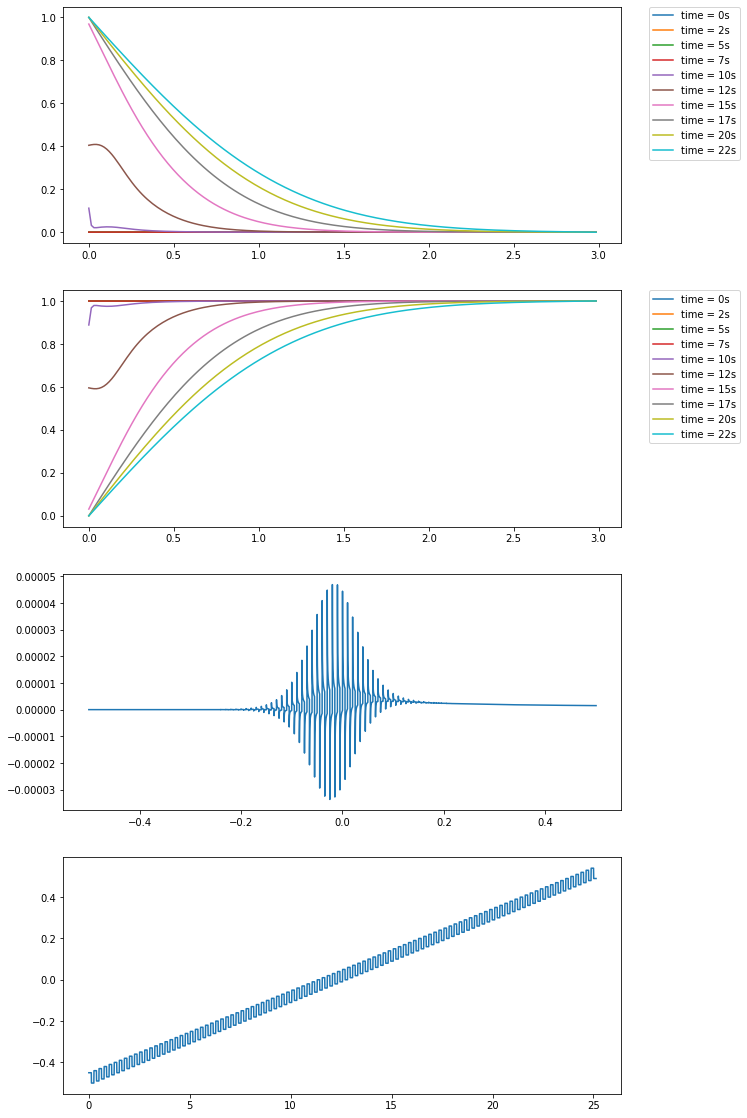

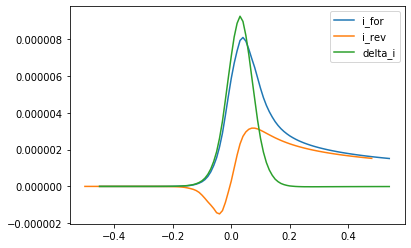

<Figure size 720x720 with 0 Axes>

In [50]:
from plot_voltammogram_E import main_SWV_E
from plot_voltammogram_E import plot_SWV
I = main_SWV_E(cst_all)
(E_for, I_for, E_rev, I_rev, Delta_I) = plot_SWV(cst_all, I)

In [52]:
import sys

'/Users/julesschleinitz/Desktop/These/Git_Electrochemistry/Electrochemistry'